# Operations on Distributions

This notebook is for Chapter 6 

Objective: Combining random variables from different distributions and forming new random variables.

In [11]:
from __future__ import division, print_function
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
%matplotlib inline

## Skewness


Measures assymetry of a distribution. By definition:

$$g_{1} = \frac{m_{3}}{m_{2}^{3/2}}$$

$$m_{2} = \frac{1}{n} \sum (x_{i} - \mu)^{2}$$

$$m_{3} = \frac{1}{n} \sum (x_{i} - \mu)^{3}$$

Negative skewness = distribution skews left, extends further to left than right and vice versa for positive skewness.

Another way to evaluate the asymmetry of a distribution is to look at the relationship between the mean and median. Extreme values have more effect on the mean than the median, so in a distribution that skews left, the
mean is less than the median

__Pearson's median skewness__ is another measure of skewness that captures the relationship between the mean $\mu$ and median $\mu_{1/2}$. Robust statistic, ie, less vulnerable to the impact of outliers.

$$g_{p} = \frac{3 (\mu - \mu_{1/2})}{\sigma}$$

In [12]:
def skewness(xs):
    mean = np.mean(xs)
    m2 = np.mean(np.power((xs - mean), 2))
    m3 = np.mean(np.power((xs - mean), 3))
    g1 = m3 / math.pow(m2, 1.5)
    return g1

def pearson_skewness(xs):
    mean = np.mean(xs)
    median = np.median(xs)
    std = np.std(xs)
    return 3 * (mean - median) / std

In [7]:
pregnancies = pd.read_fwf("/home/venkat/ThinkStats/2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
pregnancies.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,18.0,12999.542264


In [13]:

live_births = pregnancies[pregnancies["outcome"] == 1]
preg_lengths = np.array(live_births["prglength"].dropna())
live_births["tot_birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
birth_weights = np.array(live_births["tot_birthwgt"].dropna())

print("Pregnancy lengths: skewness = %.3f, pearson skewness = %.3f" % 
      (skewness(preg_lengths), pearson_skewness(preg_lengths)))
print("Birth Weights: skewness = %.3f, pearson skewness = %.3f" % 
      (skewness(birth_weights), pearson_skewness(birth_weights)))

[39 39 39 ... 39 39 39]
Pregnancy lengths: skewness = -2.855, pearson skewness = -0.488
Birth Weights: skewness = -1.318, pearson skewness = -0.382


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


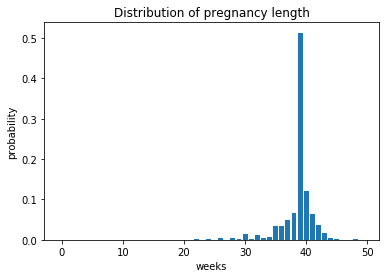

/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  app.launch_new_instance()


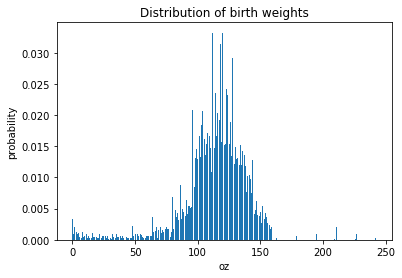

In [19]:
range_lb = np.min(preg_lengths)
range_ub = np.max(preg_lengths)
nbr_bins = range_ub - range_lb
pmf_preg_lengths = np.histogram(preg_lengths, bins=nbr_bins, range=(range_lb, range_ub), 
                                normed=True)
plt.bar(pmf_preg_lengths[1][:-1], pmf_preg_lengths[0])
plt.title("Distribution of pregnancy length")
plt.xlabel("weeks")
plt.ylabel("probability")
plt.show()

range_lb = np.min(birth_weights)
range_ub = np.max(birth_weights)
nbr_bins = int(range_ub - range_lb)
pmf_birth_weights = np.histogram(birth_weights, bins=nbr_bins, range=(range_lb, range_ub), 
                                 normed=True)
plt.bar(pmf_birth_weights[1][:-1], pmf_birth_weights[0])
plt.title("Distribution of birth weights")
plt.xlabel("oz")
plt.ylabel("probability")
plt.show()

In [ ]:
income_dist = [(0, 2489989), (2500, 11638707), (7500, 12139638), 
               (12500, 11702056), (17500, 11076002), (22500, 9866247), 
               (27500, 8743581), (35000, 14554280), (45000, 11087123), 
               (62500, 19196461), (87500, 11729485), (150000, 13851341),
               (350000, 3476747), (750000, 577618), (1250000, 140635), 
               (1750000, 59460), (3500000, 86329), (7500000, 21390), 
               (15000000, 13480)]

pop = []
for income, nbr_reporters in income_dist:
    for i in range(nbr_reporters):
        pop.append(income)
        
print(pop)
population = np.array(pop)
mean = np.mean(population)
nbr_pop = population.shape[0]
nbr_below_mean = np.where(population < mean)[0].shape[0]
median = np.median(population)
skewness = skewness(pop)
pearson_skewness = pearson_skewness(pop)
print("Fraction of population reporting below mean income: %.3f" % (nbr_below_mean / nbr_pop))
print("Mean of distribution: %.2f" % (mean))
print("Median of distribution: %.2f" % (median))
print("Skewness of distribution: %.3f" % (skewness))
print("Pearson Skewness of distribution: %.3f" % (pearson_skewness))

# Random Variables

Represents a process that generated it. It is a random value selected from a distribution.





In [13]:
class RandomVariable(object):
    """ Parent class of all random variables """
    
class Exponential(RandomVariable):
    def __init__(self, lam):
        self.lam = lam
    def generate(self):
        return np.random.exponential(self.lam)


e = Exponential(0.1)
print("exponential(0.1) = %.3f" % (e.generate()))


exponential(0.1) = 0.000


## PDFs

The derivative of a CDF is called a PDF (probability density function). 

$$PDF_{expo}(x) = \lambda e^{-\lambda x}$$

$$PDF_{normal}(x) = \frac{1}{\sigma \sqrt{2 \pi}} exp \left [ -\frac{1}{2} \left ( \frac{x - \mu}{\sigma} \right )^{2} \right ]$$

Evaluating a PDF at some x results in a probability density. To get the probability mass, we have to integrate over x. For example, the probability that X falls within (-0.5, 0.5) is:

$$P(-0.5 \leq X < 0.5) = \int_{-0.5}^{0.5} PDF_{X}(x) dx$$

or equivalently:

$$P(-0.5 \leq X < 0.5) = CDF_{X}(0.5) - CDF_{X}(-0.5)$$


In [14]:
norm = scipy.stats.norm(loc=178, scale=math.sqrt(59.4))
prob = norm.cdf(185.4) - norm.cdf(177.8)
print("percentage of male population in range: %.3f" % (prob * 100))

percentage of male population in range: 34.186


## Convolutions

Answers question - if we have two random variables X and Y, with distributions CDF(x) and CDF(y), what is the distribution for the sum Z = X + Y?

$$PDF_{Z}(z) = \int_{-\infty}^{\infty} PDF_{Y}(z-x)PDF_{X}(x)dx$$

$$PDF_{Z} = PDF_{Y} \star PDF_{X}$$

As an example, assuming X and Y are exponential distributions with parameter $\lambda$. Then the distribution of Z = X + Y is:

$$PDF_{Z}(z) = \int_{-\infty }^{\infty } PDF_{X}(x)PDF_{Y}(z-x) dx = \int_{-\infty }^{\infty } \lambda e^{-\lambda x} \lambda e^{\lambda (z-x)} dx$$

Since exponential is 0 for all negative values, we can adjust our limits:

$$PDF_{Z}(z) = \int_{0}^{z} \lambda e^{-\lambda x} \lambda e^{-\lambda(z - x)} dx = \lambda^{2} e^{-\lambda z} \int_{0}^{z} dx = \lambda^{2} z e^{-\lambda z}$$

__Exercise 6.7:__ If X has an exponential distribution with parameter $\lambda$ and Y has an Erlang distribution with parameters $\lambda$ and k, what is the distribution of the sum Z = X + Y?

$$PDF_{expo} = \lambda e^{-\lambda x}$$

$$PDF_{erlang} = \frac{\lambda^{k} x^{k-1} e^{-\lambda x}}{(k-1)!}$$

$$PDF_{Z}(z) = \int_{-\infty}^{\infty} PDF_{Y}(z-x) PDF_{X}(x) dx = \frac{\lambda^{k+1}}{(k-1)!} \int_{-\infty}^{\infty} (z-x)^{k-1} e^{-\lambda z} dx$$

__Exercise 6.9:__ If you are given PMF objects, you can compute the distribution of the sum (or max) by enumerating all pairs of values. Write a function that computes the PMF of Z = max(X, Y).

/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':
/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on 

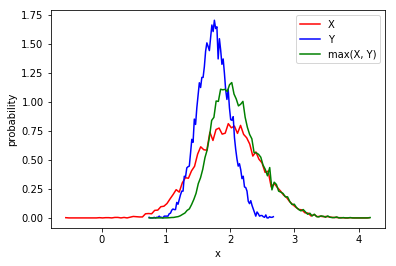

In [15]:
xs = np.random.normal(2, 0.5, 10000)
ys = np.random.normal(1.75, 0.25, 10000)
zs = []
for x in xs:
    for y in ys:
        zs.append(max(x, y))
        
pmf_xs = np.histogram(xs, bins=100, normed=True)
pmf_ys = np.histogram(ys, bins=100, normed=True)
pmf_zs = np.histogram(zs, bins=100, normed=True)

plt.plot(pmf_xs[1][:-1], pmf_xs[0], color="red", label="X")
plt.plot(pmf_ys[1][:-1], pmf_ys[0], color="blue", label="Y")
plt.plot(pmf_zs[1][:-1], pmf_zs[0], color="green", label="max(X, Y)")
plt.xlabel("x")
plt.ylabel("probability")
plt.legend(loc="best")


## Why normal?

Normal distributions are closed under linear transformation and convolution. Assume a distribution $X \sim \mathcal{N} (\mu, \sigma^{2})$, the distribution over a linear transformation $X{}' = aX + b$ is given by:

$$X{}' \sim \mathcal{N} (a \mu + b, a^{2}\sigma^{2})$$

The distribution over a convolution Z = X + Y, where $X \sim \mathcal{N}(\mu_{X}, \sigma_{X^{2}})$ and $Y \sim \mathcal{N}(\mu_{Y}, \sigma_{Y^{2}})$ is given by:

$$Z \sim \mathcal{N}(\mu_{X} + \mu_{Y}, \sigma_{X}^{2} + \sigma_{X}^2)$$

/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':
/home/venkat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on 

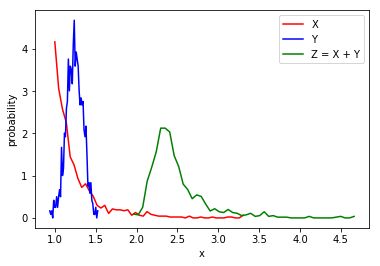

In [16]:
# X ~ Pareto distribution x_min = 1, alpha = 5
#  mean = 1.25 and variance = 0.1
# Y ~ Normal mean = 1.25, variance = 0.1
xs = 1 + np.random.pareto(5, 1000)
ys = np.random.normal(1.25, 0.1, 1000)
zs = xs + ys

pmf_xs = np.histogram(xs, bins=50, normed=True)
pmf_ys = np.histogram(ys, bins=50, normed=True)
pmf_zs = np.histogram(zs, bins=50, normed=True)

plt.plot(pmf_xs[1][:-1], pmf_xs[0], color="red", label="X")
plt.plot(pmf_ys[1][:-1], pmf_ys[0], color="blue", label="Y")
plt.plot(pmf_zs[1][:-1], pmf_zs[0], color="green", label="Z = X + Y")
plt.xlabel("x")
plt.ylabel("probability")
plt.legend(loc="best")

Text(0.5, 1.0, 'Z is lognormal distribution')

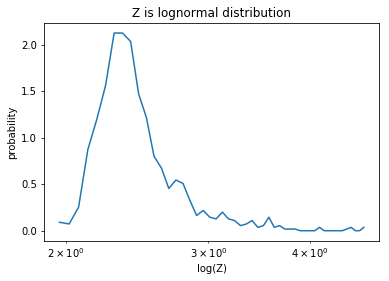

In [17]:
plt.semilogx(pmf_zs[1][:-1], pmf_zs[0])
plt.xlabel("log(Z)")
plt.ylabel("probability")
plt.title("Z is lognormal distribution")

## Central Limit Theorem

If we add up the values from almost any distribution, the distribution of the sums converge to normal. Further if the distribution has mean $\mu$ and standard deviation $\sigma$, then the distribution of the sum is approximately $\mathcal{N}(n\mu, n\sigma^{2})$.

Caveats:
* values have to be drawn independently
* values have to come from the same distribution
* values have to be drawn from a distribution with finite mean and variance (so no Pareto).
* number of values needed depends on skewness.


Text(0, 0.5, 'Sum of samples')

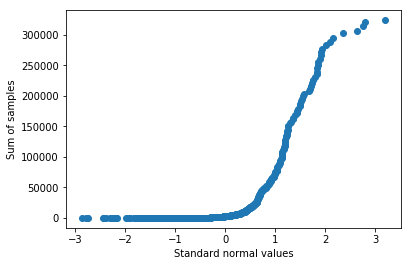

In [18]:
num_samples = 500
sample_sums = np.zeros(num_samples)
sample_sizes = np.logspace(1, 16, num=num_samples, endpoint=True, base=2)
for i in range(num_samples):
    samples = np.random.exponential(5, int(sample_sizes[i]))
    sample_sums[i] = np.sum(samples)
dataset = np.sort(sample_sums)

# normal_samples
normal_samples = np.sort(np.random.normal(0, 1, num_samples))
plt.scatter(normal_samples, dataset)
plt.xlabel("Standard normal values")
plt.ylabel("Sum of samples")